<a href="https://colab.research.google.com/github/melling/NeuralNetworksFromScratch/blob/main/MakeOwnNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy

import numpy as np
import scipy.special # expit

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls gdrive/MyDrive/ml_data

make_nn_scratch  thinkstat   x_train.npy  y_train.npy
svhn_data	 x_test.npy  y_test.npy


# Original Neural Network from Book

In [ ]:
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        

In [ ]:
class NeuralNetwork:

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate=0.1):
    self.inodes = input_nodes
    self.hnodes = hidden_nodes
    self.onodes = output_nodes

    self.learning_rate = learning_rate

    # Link Weights
    # link weight matrices, wih and who
    # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer

    # w_11, w_21 - col,row??
    # w_21, w_22 etc

    # wih - weights_input2hidden
    # who - weights_hidden2output
    # Important: Get the dimensions right
    self.weights_input2hidden = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
    self.weights_hidden2output = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    self.activation_function = lambda x: scipy.special.expit(x)

  def train(self, input_list, targets_list):
    inputs = np.array(input_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    # Calculate signals into hidden layer
    hidden_inputs = np.dot(self.weights_input2hidden, inputs)

    hidden_outputs = self.activation_function(hidden_inputs)
    # print(f"weights_hidden2output={self.weights_hidden2output.shape} / hidden_outputs shape={hidden_outputs.shape}")

    final_inputs = np.dot(self.weights_hidden2output, hidden_outputs)

    final_outputs = self.activation_function(final_inputs)

    # output layer error is the (target ­ actual)
    output_errors = targets - final_outputs

    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
    hidden_errors = np.dot(self.weights_hidden2output.T, output_errors)

    # update the weights for the links between the hidden and output layers
    self.weights_hidden2output += self.learning_rate * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs))
    
    self.weights_input2hidden += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))

  def query(self, input_list):
    # convert inputs list to 2d numpy array
    inputs = np.array(input_list, ndmin=2).T

    # Calculate signals into hidden layer
    hidden_inputs = np.dot(self.weights_input2hidden, inputs)

    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.weights_hidden2output, hidden_outputs)

    final_outputs = self.activation_function(final_inputs)

    return final_outputs

# Invoke NN

In [ ]:
nn = NeuralNetwork(input_nodes=3, hidden_nodes=3, output_nodes=3, learning_rate=0.3)

nn.query([1.0,0.5,-1.5])


array([[0.45114505],
       [0.54813201],
       [0.49978776]])

# MNIST Digits

In [ ]:
import matplotlib.pyplot
%matplotlib inline

In [ ]:
# data_file​ = open("mnist_dataset/mnist_train_100.csv", 'r')
# data_file​ = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_train_100.csv", 'r')
data_file = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_train_100.csv", 'r')

data_list = data_file.readlines()
data_file.close()
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

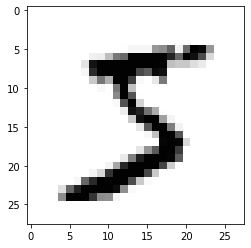

In [ ]:
all_values = data_list[0].split(',')

# Skip first element, it's the target
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

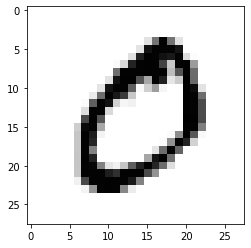

In [ ]:
all_values = data_list[1].split(',')

# Skip first element, it's the target
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None');

# Scale the Data

Dividing the raw inputs which are in the range 0­255 by 255 will bring them into the range 0­1. We then need to multiply by 0.99 to bring them into the range 0.0 ­ 0.99. We then add 0.01 to shift them up to the desired range 0.01 to 1.00 -- p151

In [ ]:
scaled_input = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
# print(scaled_input)

In [ ]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [ ]:
targets[int(all_values[0])] = 0.99
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# Here we go!

# Load Training Data/Small Set

In [ ]:
training_data_file = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_train_100.csv", 'r')

training_data_list = training_data_file.readlines()
training_data_file.close()


# Create Neural Network

In [ ]:
input_nodes = 784

hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Train the Neural Network on Small Data Set

In [ ]:
# Go through all the training data

for record in training_data_list:
  all_values = record.split(',')
  label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[label] = 0.99 # Label/Answer/Target is first value. 
  # print(f"Training digit: {label}, {inputs.shape}, {targets.shape}")
  
  nn.train(inputs, targets)


# Test the Network

## Load Small Test Data

In [ ]:
test_data_file = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_test_10.csv", 'r')

test_data_list = test_data_file.readlines()
test_data_file.close()


## Show First Record

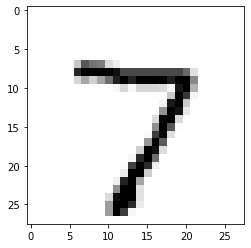

In [ ]:
all_values = test_data_list[0].split(',')

# Skip first element, it's the target
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None');

# Predict First Test Record

Notice that we score around 38% on prediction

In [ ]:
nn.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.10826455],
       [0.10551061],
       [0.06660755],
       [0.16899288],
       [0.14121594],
       [0.05279172],
       [0.04623024],
       [0.38979772],
       [0.11335914],
       [0.07974338]])

# Predict for Small MNIST Dataset

Generate a Scorecard

In [ ]:
scorecard = []


for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0])
  print(f"Correct label: {correct_label}")

  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # Scale
  # targets = np.zeros(output_nodes) + 0.01
  # targets[label] = 0.99 # Label/Answer/Target is first value. 
  outputs = nn.query(inputs)

  label = np.argmax(outputs)
  # print(f"Network predicted answer: {label}")

  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)


Correct label: 7
Correct label: 2
Correct label: 1
Correct label: 0
Correct label: 4
Correct label: 1
Correct label: 4
Correct label: 9
Correct label: 5
Correct label: 9


In [ ]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [ ]:
scorecard_array = np.asarray(scorecard)
print(f"Performance = {scorecard_array.sum()/ scorecard_array.size}")

Performance = 0.6


# Full Training/Test Dataset

## Load Full Training Data

In [ ]:
training_data_file = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_train.csv", 'r')

training_data_list = training_data_file.readlines()
training_data_file.close()


# Load Full Test Data

In [ ]:
test_data_file = open("gdrive/MyDrive/ml_data/make_nn_scratch/mnist_test.csv", 'r')

test_data_list = test_data_file.readlines()
test_data_file.close()


In [ ]:
input_nodes = 784

hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [ ]:
# Go through all the training data

for record in training_data_list:
  all_values = record.split(',')
  label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[label] = 0.99 # Label/Answer/Target is first value. 
  # print(f"Training digit: {label}, {inputs.shape}, {targets.shape}")
  
  nn.train(inputs, targets)


# Show First Record

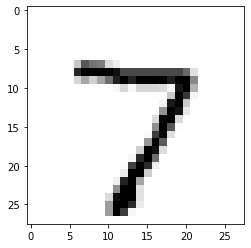

In [ ]:
all_values = test_data_list[0].split(',')

# Skip first element, it's the target
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None');

# Predict First Record

Notice that we score around 98% on prediction.

More training data helped!

In [ ]:
nn.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00124618],
       [0.00287181],
       [0.0015874 ],
       [0.00170769],
       [0.0016063 ],
       [0.00390413],
       [0.00179864],
       [0.98691466],
       [0.00218761],
       [0.00417134]])

# Score for Full Dataset

In [ ]:
scorecard = []


for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0])
  # print(f"Correct label: {correct_label}")

  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # Scale
  # targets = np.zeros(output_nodes) + 0.01
  # targets[label] = 0.99 # Label/Answer/Target is first value. 
  outputs = nn.query(inputs)

  label = np.argmax(outputs)
  # print(f"Network predicted answer: {label}")

  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)


# Scorecard

In [ ]:
scorecard_array = np.asarray(scorecard)
print(f"Performance = {scorecard_array.sum()/ scorecard_array.size}")

Performance = 0.9453


# Add Epochs

In [ ]:
input_nodes = 784

hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

epochs = 5

# Go through all the training data
for e in range(epochs):
  for record in training_data_list:
    all_values = record.split(',')
    label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[label] = 0.99 # Label/Answer/Target is first value. 
    # print(f"Training digit: {label}, {inputs.shape}, {targets.shape}")
    
    nn.train(inputs, targets)

In [ ]:
scorecard = []

for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0])
  # print(f"Correct label: {correct_label}")

  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # Scale
  # targets = np.zeros(output_nodes) + 0.01
  # targets[label] = 0.99 # Label/Answer/Target is first value. 
  outputs = nn.query(inputs)

  label = np.argmax(outputs)
  # print(f"Network predicted answer: {label}")

  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)


In [ ]:
scorecard_array = np.asarray(scorecard)
print(f"Performance = {scorecard_array.sum()/ scorecard_array.size}")

Performance = 0.9738
